<a href="https://colab.research.google.com/github/aliwilson2000/OptiIIProject1/blob/main/CNNTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization II Project 1

### Instructions:
The goal of this assignment is to **create a neural network that has greater than 99%
accuracy on the MNIST dataset**.

Step 1: Fit a convolutional neural network and a transformer neural network.
(Find the best architecture you can for each of these and compare the 2
structures.)


- Cross-validation = just use a validation set approach for this assignment.
(TensorFlow; set validation split = 0.2 when
you train the model)
- CNN: use multiple convolutional layers, different filter sizes, different
number of filters, multiple max pool layers, several dense layers, regularizers, dropout layers, different batch sizes or number of epochs; whatever gets you greater than 99% (to 99.5%)
accuracy on the validation set.
- For the transformer: use different hidden, key/query, and value dimensions,
different number of heads for the MHSA layers, different number of layers,

# Step Up:

In [ ]:
#Import the necessary packages first:

#First, importing tensorflow and keras packages:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import layers, models, regularizers
#Also importing MNIST dataset from Keras and Tensorflow:
from tensorflow.keras.datasets import mnist

#Importing NumPy packages:
import numpy as np
from numpy.random import seed

#Importing Matplotlib package:
import matplotlib.pyplot as plt

#To later mount our NN to our drive we will also import drive
from google.colab import drive


#If you are working in Jupyter notebook you may need to also install the above packages (Colab already has them downloaded)

Now we have imported the packages we can delve into the MNIST dataset! For more information on it (though we should explain it in Anvil) this is the link below:
https://www.tensorflow.org/datasets/catalog/mnist


In [ ]:
tf.random.set_seed(18) #seeding to ensure reproducibility
seed(20)

In [ ]:
#Next we need to load and process the data:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Visualizing the Training Data:

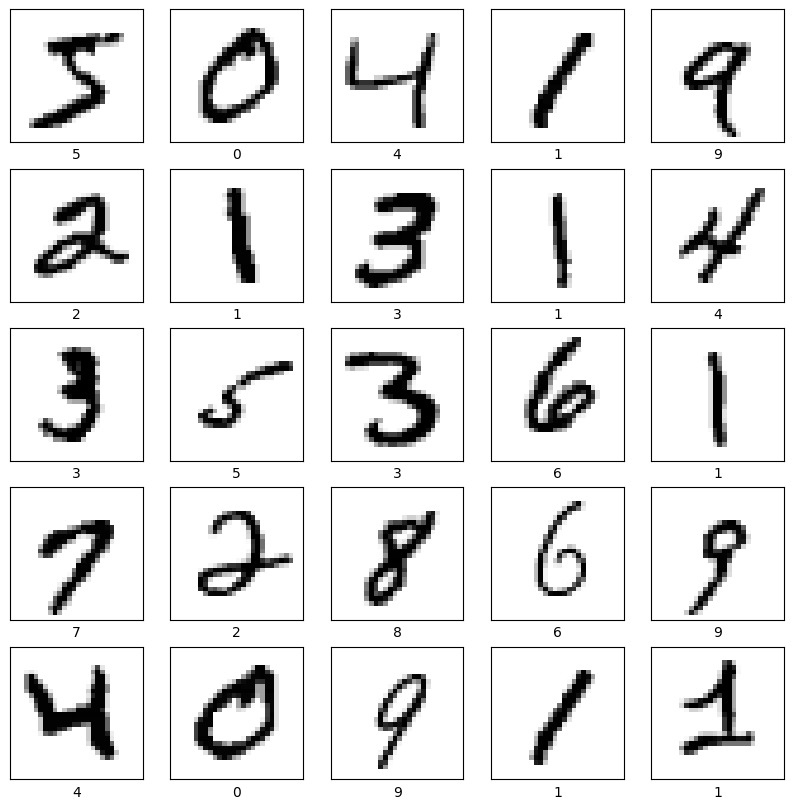

In [ ]:
#Now I want to have a look at some of the images in the training set (with labels) to know what I am dealing with:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

Since the dataset is stored in an array of shape I need to use the reshape function (esp. for Tensorflow):

In [ ]:
#Load and preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
#Look at the shape of the training data (i.e. how many images are we dealing with and other shape information)
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

From this we can see we are dealing with images that are 28x28x1 and we have 60,000 training images, 10,000 test images.

#Building the Models part 1: CNN Models

This next part has been some trial and error since we are aiming to get accuracy percentages of 99.5%. We have documented playing around with different models and will compare which one to use going forward at the end.

### CNN Model 1:

In [ ]:
# Define the CNN model architecture
model_cnn1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_cnn1.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

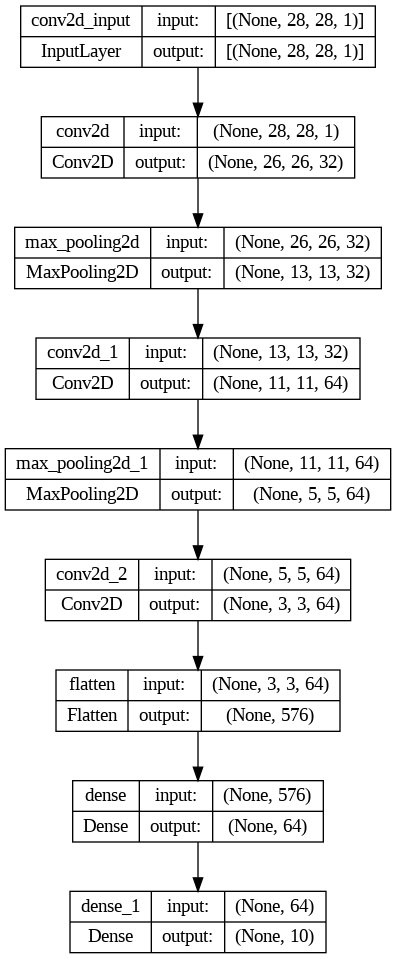

In [ ]:
# Plot the model architecture
plot_model(model_cnn1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Now we will run our CNN with epochs = 10, batch size = 64, and validation split at 20%. This will remain constant for all models we try.




In [ ]:
model_cnn1.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 57s 74ms/step - loss: 0.2140 - accuracy: 0.9321 - val_loss: 0.0915 - val_accuracy: 0.9736
Epoch 2/10
750/750 [==============================] - 52s 69ms/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 0.0521 - val_accuracy: 0.9852
Epoch 3/10
750/750 [==============================] - 58s 77ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0622 - val_accuracy: 0.9818
Epoch 4/10
750/750 [==============================] - 61s 81ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0398 - val_accuracy: 0.9897
Epoch 5/10
750/750 [==============================] - 50s 67ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0422 - val_accuracy: 0.9872
Epoch 6/10
750/750 [==============================] - 47s 62ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0430 - val_accuracy: 0.9877
Epoch 7/10
750/750 [==============================] - 43s 57ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0426 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_cnn1.evaluate(test_images, test_labels)

print(f'Test Accuracy for Model 1: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0315 - accuracy: 0.9912
Test Accuracy for Model 1: 0.9911999702453613


This CNN model looks to be successful, with a 98.94 validation accuracy. Nevertheless, we have continued to test out other CNN Models since we are aiming for a higher accuracy.

### CNN Model 2:
Changes made for Second CNN Model:
- Model 2 has a dense layer with 128 neurons, Model 1 has only 64. Larger number of neurons can capture more complex relationships.
- Model 2 has a dropout layer rate of 0.5, meaning 50% of the information is randomly discarded each update cycle. This helps overfitting. Model 1 does not have a dropout layer (it is more basic).
- Model 1 has a third convolutional layer


In [ ]:
model_cnn2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model_cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn2.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 46s 60ms/step - loss: 0.2709 - accuracy: 0.9169 - val_loss: 0.0719 - val_accuracy: 0.9795
Epoch 2/10
750/750 [==============================] - 42s 56ms/step - loss: 0.0965 - accuracy: 0.9714 - val_loss: 0.0573 - val_accuracy: 0.9834
Epoch 3/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0715 - accuracy: 0.9788 - val_loss: 0.0473 - val_accuracy: 0.9866
Epoch 4/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 5/10
750/750 [==============================] - 42s 57ms/step - loss: 0.0476 - accuracy: 0.9856 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 6/10
750/750 [==============================] - 43s 57ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0378 - val_accuracy: 0.9887
Epoch 7/10
750/750 [==============================] - 43s 57ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0384 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_cnn2.evaluate(test_images, test_labels)

print(f'Test Accuracy for Model 2: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0263 - accuracy: 0.9920
Test Accuracy for Model 2: 0.9919999837875366


This CNN performs a lot better than Model 1. We changed quite a few things from CNN1 to CNN2 so we are going to find out which changes worked and which didn't to go forward...

### CNN Model 3:


Model 3 adds the third convolutional layer back, while keeping the dropout layer and larger dense layer with 128 units.

In [ ]:
model_cnn3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the combined model
model_cnn3.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [ ]:
# Compile the combined model
model_cnn3.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

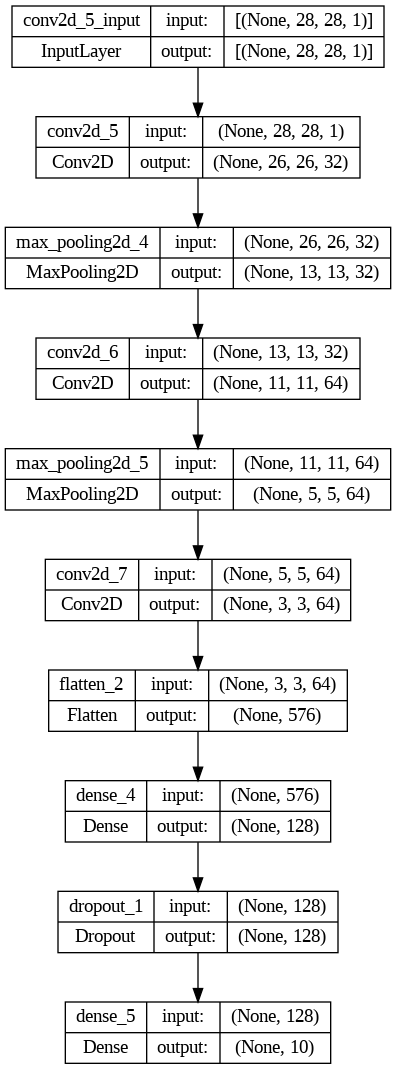

In [ ]:
plot_model(model_cnn3, to_file='model_combined_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
test_loss, test_acc = model_cnn3.evaluate(test_images, test_labels)

print(f'Test Accuracy for Model 3: {test_acc}')

313/313 [==============================] - 4s 13ms/step - loss: 2.3067 - accuracy: 0.0953
Test Accuracy for Model Combined: 0.09529999643564224


### CNN Model 4:

This is our "crazy" model, i.e. add everything we can think of and every tool to see what happens:

**Changes for Model 4:**
- Batch Normalization (Added after each convolutional layer but before activation functions to help normalizing inputs of each layer)
- Additional Convolutional Layer with 128 filters (to try and capture more diverse features)
- Added more depth in the dense layers
- L2 regularization was added to the dense layers to penalize large weights

**Early stopping** was added to terminate the training process when the validation loss stops improving.



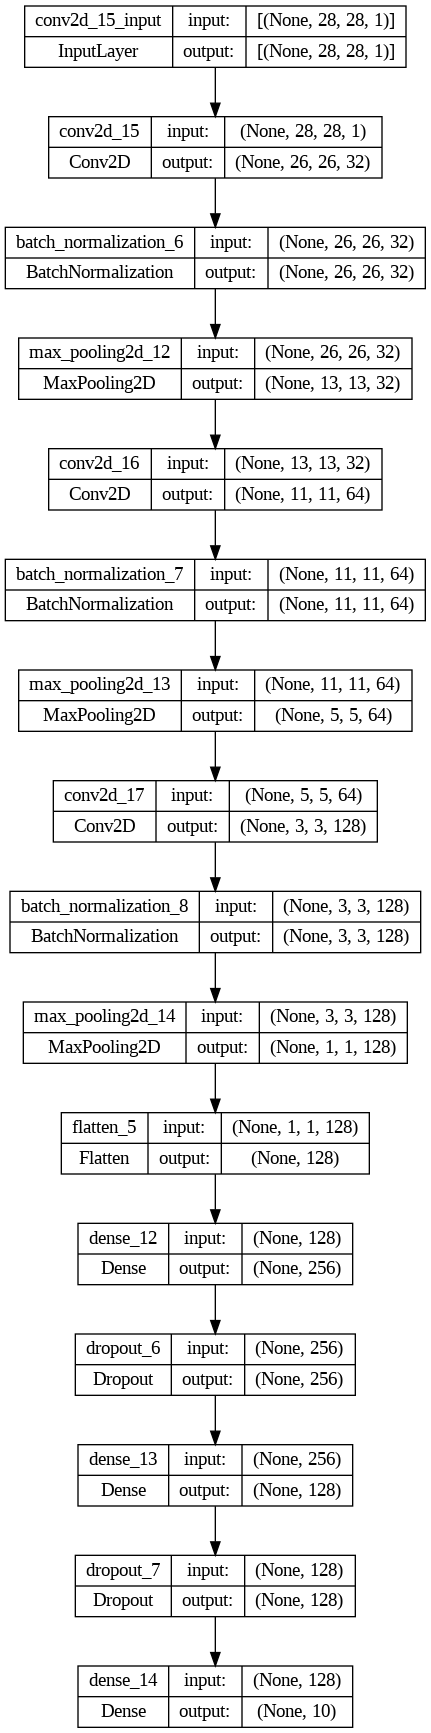

In [ ]:
#Since we are going to go all out we will import batch normalization too...
from tensorflow.keras.layers import BatchNormalization


model_cnn4 = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_cnn4.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Implement early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

plot_model(model_cnn4, to_file='model_combined_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:

model_cnn4 = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
# Train the model with validation split
history = model_cnn4.fit(train_images, train_labels,
                         epochs=10, batch_size=64,
                         validation_split=0.2,
                         callbacks=[early_stopping])

Epoch 1/10
750/750 [==============================] - 85s 111ms/step - loss: 0.5755 - accuracy: 0.9081 - val_loss: 0.2889 - val_accuracy: 0.9768
Epoch 2/10
750/750 [==============================] - 76s 101ms/step - loss: 0.2465 - accuracy: 0.9756 - val_loss: 0.1681 - val_accuracy: 0.9836
Epoch 3/10
750/750 [==============================] - 65s 87ms/step - loss: 0.1591 - accuracy: 0.9806 - val_loss: 0.1387 - val_accuracy: 0.9804
Epoch 4/10
750/750 [==============================] - 67s 90ms/step - loss: 0.1190 - accuracy: 0.9835 - val_loss: 0.1149 - val_accuracy: 0.9825
Epoch 5/10
750/750 [==============================] - 66s 88ms/step - loss: 0.0967 - accuracy: 0.9861 - val_loss: 0.0997 - val_accuracy: 0.9844
Epoch 6/10
750/750 [==============================] - 66s 88ms/step - loss: 0.0867 - accuracy: 0.9884 - val_loss: 0.0933 - val_accuracy: 0.9861
Epoch 7/10
750/750 [==============================] - 63s 84ms/step - loss: 0.0809 - accuracy: 0.9884 - val_loss: 0.0985 - val_accurac

In [ ]:
test_loss, test_acc = model_cnn4.evaluate(test_images, test_labels)

print(f'Test Accuracy for Model 4: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.1015 - accuracy: 0.9835
Test Accuracy for Model Combined: 0.9835000038146973


Again, this model has not provided us with an improved accuracy in comparison to Model 2.

Now that we have tried four different models, we are going to proceed with the model that gave us the highest Test Accuracy (**Model 2**).

# CNN Model Visualizations for Best CNN:

While we do not need to rerun the entire model, I have ran it again and changed the name of the CNN2 to just CNN and saved the History (for visualization purposes). From here I will produce the visualizations and then mount the CNN to the drive. Thus, if the user wants to skip viewing the trial and error process that took place for the infrastructure of the CNN, they can skip to this part!

In [ ]:
# Build the CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<font color = blue> **Learning Curves:**

Epoch 1/10
750/750 [==============================] - 39s 51ms/step - loss: 0.2779 - accuracy: 0.9146 - val_loss: 0.0657 - val_accuracy: 0.9809
Epoch 2/10
750/750 [==============================] - 40s 53ms/step - loss: 0.0933 - accuracy: 0.9729 - val_loss: 0.0571 - val_accuracy: 0.9836
Epoch 3/10
750/750 [==============================] - 38s 51ms/step - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.0445 - val_accuracy: 0.9868
Epoch 4/10
750/750 [==============================] - 38s 51ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.0384 - val_accuracy: 0.9886
Epoch 5/10
750/750 [==============================] - 38s 51ms/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 6/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.0340 - val_accuracy: 0.9905
Epoch 7/10
750/750 [==============================] - 37s 49ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0352 - val_accuracy:

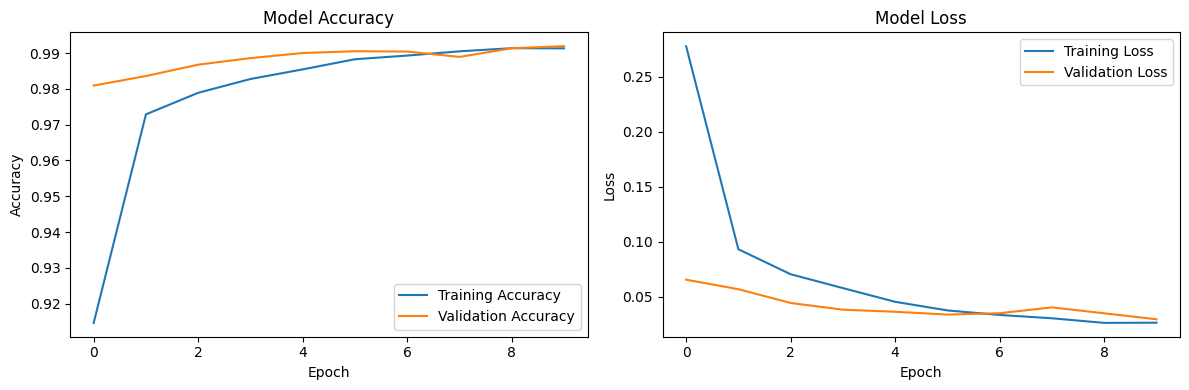

In [ ]:

# Train the model and save the history
history = model_cnn.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Now you can access the history object to plot the learning curves.
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


<font color = blue> Now that we have the model we want to move forward with, we are going to mount it to our drive:

In [ ]:

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)


NameError: name 'drive' is not defined

In [ ]:
# saving the model for reproducibility

model_cnn.save("/content/drive/MyDrive/optimization2_hw_1.keras")

<Font color = blue> **Running the Model from Drive:**

In [ ]:
NNmodel2 = tf.keras.models.load_model("/content/drive/MyDrive/optimization2_hw_1.keras")

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels)

print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 4s 13ms/step - loss: 0.0247 - accuracy: 0.9923
Test Accuracy: 0.9922999739646912


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

x_train_plot = x_train
x_test_plot = x_test

x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

xshape = x_train.shape[1:4]


313/313 [==============================] - 3s 10ms/step


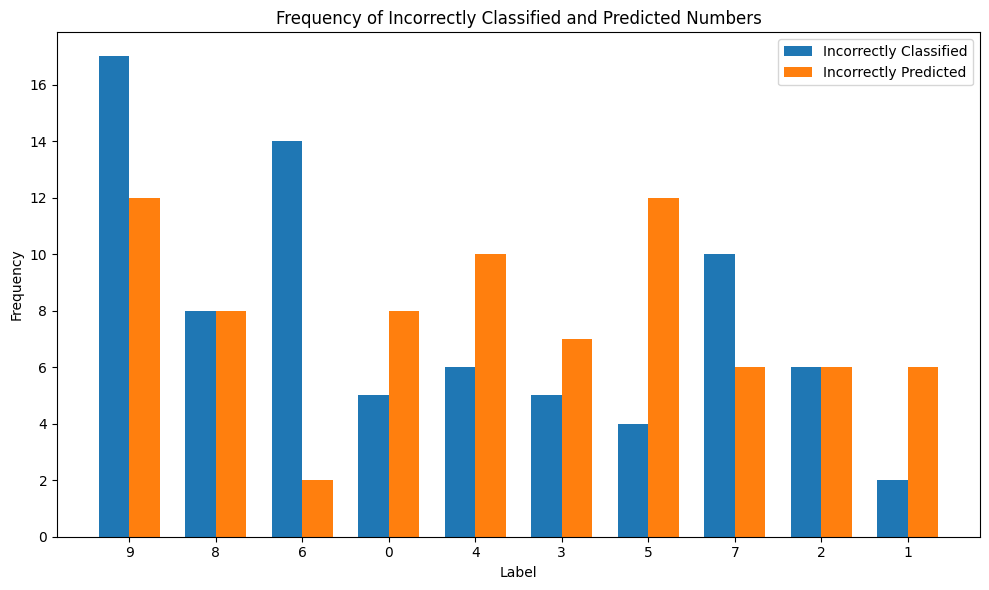

In [ ]:

# Predict on the test set
predictions = NNmodel2.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Find indices of incorrectly classified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# Count the frequency of both incorrectly classified and incorrectly predicted numbers
incorrect_numbers_count = {}
for idx in incorrect_indices:
    true_label = y_test[idx] # Extract scalar value from array
    predicted_label = predicted_labels[idx]

    # Count incorrectly classified numbers
    if true_label not in incorrect_numbers_count:
        incorrect_numbers_count[true_label] = {'classified': 1, 'predicted': 0}
    else:
        incorrect_numbers_count[true_label]['classified'] += 1

    # Count incorrectly predicted numbers
    if predicted_label not in incorrect_numbers_count:
        incorrect_numbers_count[predicted_label] = {'classified': 0, 'predicted': 1}
    else:
        incorrect_numbers_count[predicted_label]['predicted'] += 1

# Plot the graph
plt.figure(figsize=(10, 6))

labels = list(incorrect_numbers_count.keys())
classified_counts = [incorrect_numbers_count[label]['classified'] for label in labels]
predicted_counts = [incorrect_numbers_count[label]['predicted'] for label in labels]

bar_width = 0.35
index = np.arange(len(labels))

plt.bar(index, classified_counts, width=bar_width, label='Incorrectly Classified')
plt.bar(index + bar_width, predicted_counts, width=bar_width, label='Incorrectly Predicted')

plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of Incorrectly Classified and Predicted Numbers')
plt.xticks(index + bar_width / 2, labels)
plt.legend()
plt.tight_layout()
plt.show()

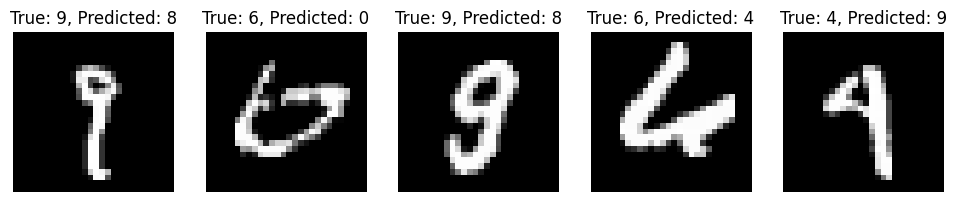

In [ ]:
# Plot some examples of incorrectly classified images
plt.figure(figsize=(12, 12))
for i, idx in enumerate(incorrect_indices[:5]):  # Display the first 5 incorrectly classified images
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Predicted: {predicted_labels[idx]}')
    plt.axis('off')

plt.show()

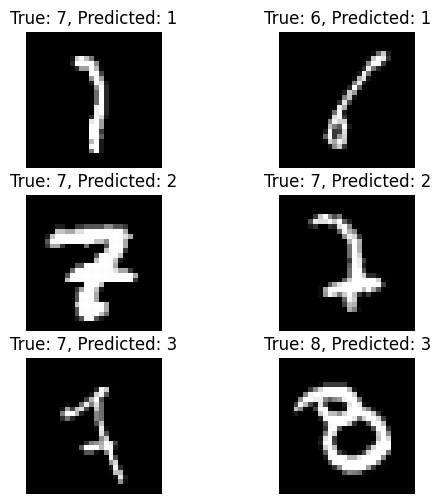

In [ ]:

# Plot some examples of incorrectly predicted images
# Find indices of incorrectly predicted samples for labels 1, 2, and 3
incorrect_indices_1 = np.where((y_test != 1) & (predicted_labels == 1))[0][:2]
incorrect_indices_2 = np.where((y_test != 2) & (predicted_labels == 2))[0][:2]
incorrect_indices_3 = np.where((y_test != 3) & (predicted_labels == 3))[0][:2]

# Concatenate the indices for the selected labels
selected_indices = np.concatenate([incorrect_indices_1, incorrect_indices_2, incorrect_indices_3])

# Plot the selected examples
plt.figure(figsize=(6, 6))
for i, idx in enumerate(selected_indices):
    plt.subplot(3, 2, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Predicted: {predicted_labels[idx]}')
    plt.axis('off')

plt.show()